In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read Athlete
athlete = pd.read_csv('athlete_events.csv')

In [3]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#Filter Winter olympics
winter=athlete[athlete['Season'] == 'Winter']

In [5]:
#3 Dataframe filtering gold, silver and bronze
winter_gold_winners=winter[winter['Medal']=='Gold']
winter_silver_winners=winter[winter['Medal']=='Silver']
winter_bronze_winners=winter[winter['Medal']=='Bronze']

In [6]:
#List of cities that had hosted the winter olympics
hosts=(
    winter
    .groupby('Year')['City']
    .unique()
)
hosts=list(hosts)
cities_hosting = []
for host in hosts:
    cities_hosting.append(host[0])
    
cities_hosting

['Chamonix',
 'Sankt Moritz',
 'Lake Placid',
 'Garmisch-Partenkirchen',
 'Sankt Moritz',
 'Oslo',
 "Cortina d'Ampezzo",
 'Squaw Valley',
 'Innsbruck',
 'Grenoble',
 'Sapporo',
 'Innsbruck',
 'Lake Placid',
 'Sarajevo',
 'Calgary',
 'Albertville',
 'Lillehammer',
 'Nagano',
 'Salt Lake City',
 'Torino',
 'Vancouver',
 'Sochi']

In [7]:
## We obtain the gold medals column

top3_medals_gold=(
    winter_gold_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)
    .groupby('Year')
    .head(3)
    .reset_index(drop=True)
    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

top3_medals_gold=top3_medals_gold.rename(columns = {'Event':'Gold'})
# print(medals_gold)

top3_medals_guia = top3_medals_gold.drop('Gold',axis=1)



In [10]:
## We obtain the silver medals column

top3_medals_silver=(
    winter_silver_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

top3_medals_silver=top3_medals_silver.rename(columns = {'Event':'Silver'})

keys = list(top3_medals_guia.columns.values)
i1 = top3_medals_silver.set_index(keys).index
i2 = top3_medals_guia.set_index(keys).index
top3_medals_silver_guia=top3_medals_silver[i1.isin(i2)]
top3_medals_silver_guia=top3_medals_silver_guia.reset_index(drop=True)
# medals_silver_guia

In [14]:
## We obtain the bronze medals column

top3_medals_bronze=(
    winter_bronze_winners
    .groupby(['Year','NOC','Event'])
    .count()
    .reset_index()
    .loc[:,['Year','NOC','Event']]
    .groupby(['Year','NOC'])
    .count()
    .reset_index()
    .sort_values(by=['Year','Event'],ascending=False)

    # .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

top3_medals_bronze=top3_medals_bronze.rename(columns = {'Event':'Bronze'})

keys = list(top3_medals_guia.columns.values)
i1 = top3_medals_bronze.set_index(keys).index
i2 = top3_medals_guia.set_index(keys).index
top3_medals_bronze_guia=top3_medals_bronze[i1.isin(i2)]

top3_medals_bronze_guia=top3_medals_bronze_guia.reset_index(drop=True)
# medals_bronze_guia

In [15]:
#FINAL DATAFRAME WITH the top 3 finalists of the medal table of summer olympics through time
top3_medallero=top3_medals_gold.merge(top3_medals_silver_guia,on=['Year','NOC'],how='outer').merge(top3_medals_bronze_guia,on=['Year','NOC'],how='outer').fillna(0)
# print(top3_medallero)
top3_medallero['Silver']=top3_medallero['Silver'].astype(int)
top3_medallero['Bronze']=top3_medallero['Bronze'].astype(int)
# print(medallero)

In [16]:
#Sorted Dataframe by gold, silver and bronze (That order)
top3_medallero = top3_medallero.sort_values(by = ['Year','Gold','Silver','Bronze'],ascending = False)

In [17]:
#Create lists or arrays of all the top3 finishers through time for plotting
ganadores=(
    top3_medallero
    .groupby('Year')
    # .plot.bar(x='Year',figsize=(20,10))
)

number_first_places_gold=[]
number_second_places_gold=[]
number_third_places_gold=[]

number_first_places_silver=[]
number_second_places_silver=[]
number_third_places_silver=[]

number_first_places_bronze=[]
number_second_places_bronze=[]
number_third_places_bronze=[]

names_first_places=[]
names_second_places=[]
names_third_places=[]

years=[]

for year in ganadores:
    print(year[1])
    years.append(year[0])
    names_first_places.append(year[1].iloc[0,1])
    names_second_places.append(year[1].iloc[1,1])
    names_third_places.append(year[1].iloc[2,1])
    number_first_places_gold.append(year[1].iloc[0,2])
    number_second_places_gold.append(year[1].iloc[1,2])
    number_third_places_gold.append(year[1].iloc[2,2])
    number_first_places_silver.append(year[1].iloc[0,3])
    number_second_places_silver.append(year[1].iloc[1,3])
    number_third_places_silver.append(year[1].iloc[2,3])
    number_first_places_bronze.append(year[1].iloc[0,4])
    number_second_places_bronze.append(year[1].iloc[1,4])
    number_third_places_bronze.append(year[1].iloc[2,4])
    

    Year  NOC  Gold  Silver  Bronze
64  1924  NOR     4       7       6
63  1924  FIN     4       4       3
65  1924  AUT     2       1       0
    Year  NOC  Gold  Silver  Bronze
60  1928  NOR     6       4       5
62  1928  SWE     2       2       1
61  1928  FIN     2       1       1
    Year  NOC  Gold  Silver  Bronze
57  1932  USA     6       4       2
58  1932  NOR     3       4       3
59  1932  AUT     1       1       0
    Year  NOC  Gold  Silver  Bronze
54  1936  NOR     7       5       3
55  1936  GER     3       3       0
56  1936  SWE     2       2       3
    Year  NOC  Gold  Silver  Bronze
51  1948  NOR     4       3       3
52  1948  SWE     4       3       3
53  1948  SUI     3       4       2
    Year  NOC  Gold  Silver  Bronze
48  1952  NOR     7       3       6
49  1952  USA     4       6       1
50  1952  FIN     3       4       2
    Year  NOC  Gold  Silver  Bronze
45  1956  URS     6       3       6
46  1956  AUT     4       3       4
47  1956  FIN     3       3 

In [18]:
#Labels of the final graph
labels_graph = []
for i in range(0,len(years)):
    text = str(years[i])+ '\n' + cities_hosting[i]
    labels_graph.append(text)

labels_graph

['1924\nChamonix',
 '1928\nSankt Moritz',
 '1932\nLake Placid',
 '1936\nGarmisch-Partenkirchen',
 '1948\nSankt Moritz',
 '1952\nOslo',
 "1956\nCortina d'Ampezzo",
 '1960\nSquaw Valley',
 '1964\nInnsbruck',
 '1968\nGrenoble',
 '1972\nSapporo',
 '1976\nInnsbruck',
 '1980\nLake Placid',
 '1984\nSarajevo',
 '1988\nCalgary',
 '1992\nAlbertville',
 '1994\nLillehammer',
 '1998\nNagano',
 '2002\nSalt Lake City',
 '2006\nTorino',
 '2010\nVancouver',
 '2014\nSochi']

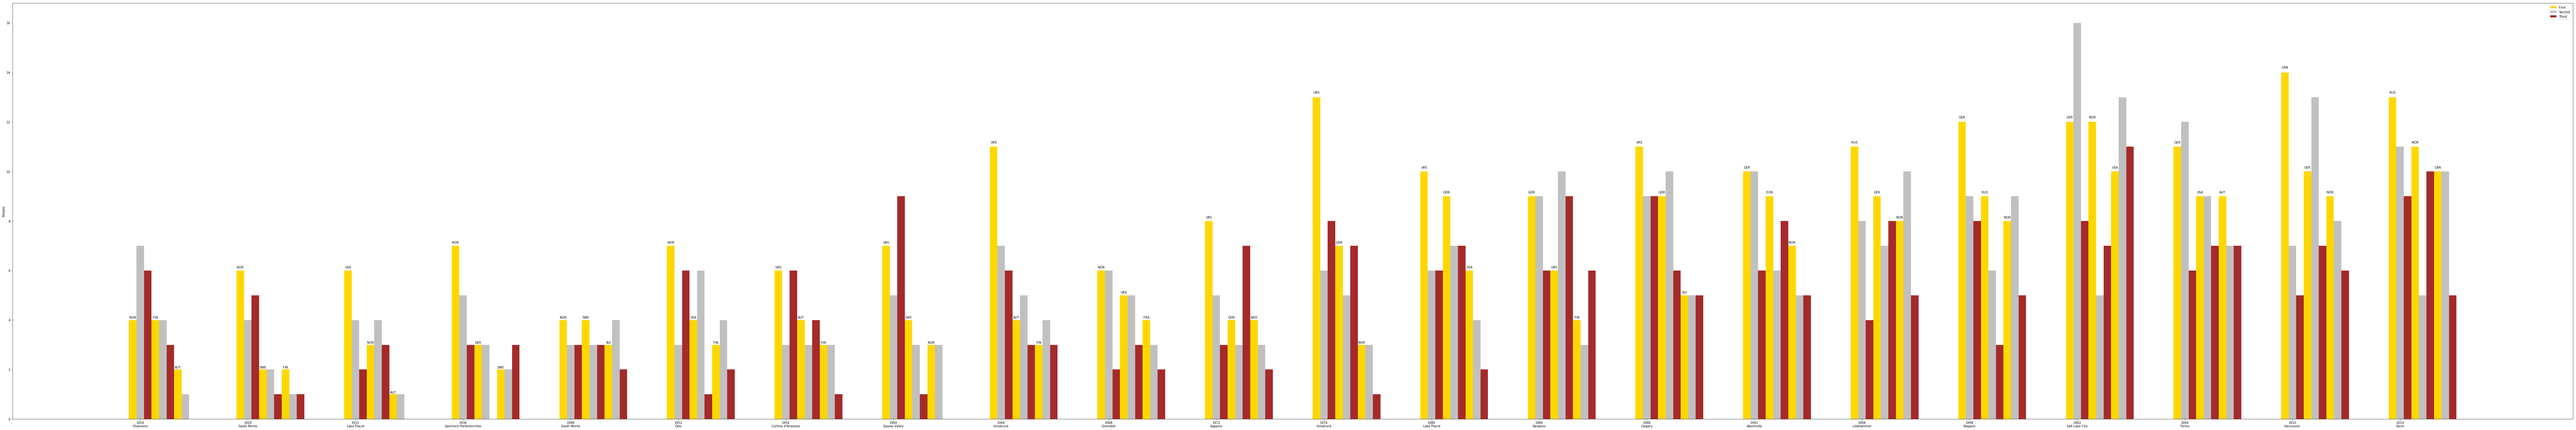

In [19]:
#FINAL GRAPH, each group of bars represent and olympic winter game, the yellow ones are the number of golds, silver
#the number of silver medals, and brown for bronze medals, the countries are sorted by gold medals, then by silver and
#finally bronze, you can also see the code of each country instead of the name, each year has the name of the city that
#hosted that olympic winter game
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(25)
fig.set_figwidth(150)

N = 22
ind = np.arange(0,N*2,2)  # the x locations for the groups
width = 0.14

rects_first_gold = ax.bar(ind, number_first_places_gold, width, color='gold')
rects_first_silver = ax.bar(ind+width, number_first_places_silver, width, color='silver')
rects_first_bronze = ax.bar(ind+width*2,number_first_places_bronze, width, color='brown')

rects_second_gold = ax.bar(ind+width*3, number_second_places_gold, width, color='gold')
rects_second_silver = ax.bar(ind+width*4, number_second_places_silver, width, color='silver')
rects_second_bronze = ax.bar(ind+width*5,number_second_places_bronze, width, color='brown')

rects_third_gold = ax.bar(ind+width*6, number_third_places_gold, width, color='gold')
rects_third_silver = ax.bar(ind+width*7, number_third_places_silver, width, color='silver')
rects_third_bronze = ax.bar(ind+width*8,number_third_places_bronze, width, color='brown')

ax.set_ylabel('Medals')
ax.set_xticks(ind+width)
ax.set_xticklabels( labels_graph )
ax.legend( (rects_first_gold[0], rects_first_silver[0], rects_first_bronze[0]), ('First', 'Second', 'Third') )

def autolabel(rects,labels):
    for i in range(0,len(rects)):
        h = rects[i].get_height()
        text = labels[i]
        ax.text(rects[i].get_x()+rects[i].get_width()/2., 1.01*h, text,
                ha='center', va='bottom')
    
autolabel(rects_first_gold,names_first_places)
autolabel(rects_second_gold,names_second_places)
autolabel(rects_third_gold,names_third_places)

